**The purpose of this notebook is to illustrate usage of the usage of the atm76 library**

_Atmospheric properties are ubiquitous and, therefore, an atmospheric model should be unique and common across all objects using it. For instance, a propulsion model and aerodynamic model using atmospheric properties should not have to instantiate two separate objects to access the same atmospheric properties. This can be accomplished in two ways: using module attributes directly or using a singleton class. The following sections illustrate usage for each use-case._

# Option 1: Module

In [21]:
import numpy as np
import atm76 as atm

# Inputs 
h = np.arange(0, 80, 5)  # km 
M = 2.0

# Static properties 
P = atm.pressure(altitude=h)  # Pa
T = atm.temperature(altitude=h)  # K
rho = atm.density(altitude=h)  # kg/m^3
a = atm.speed_of_sound(altitude=h)  # m/s
mu = atm.viscosity(altitude=h)  # kg / (m * s) * 10e-6

# Stagnation properties 
Pt = atm.total_pressure(altitude=h, mach_number=M)  # Pa
Tt = atm.total_temperature(altitude=h, mach_number=M)  # K

# To return partials instead of property values, use the boolean flag:
dP_dh = atm.pressure(altitude=h, partial=True)
dT_dh = atm.temperature(altitude=h, partial=True)
drho_dh = atm.density(altitude=h, partial=True)
da_dh = atm.speed_of_sound(altitude=h, partial=True)
dmu_dh = atm.viscosity(altitude=h, partial=True)

# For total properties, there are two partials: with respect to h and M
dPt_dh = atm.total_pressure(altitude=h, mach_number=M, partial=True)[0]
dPt_dM = atm.total_pressure(altitude=h, mach_number=M, partial=True)[1]

dTt_dh = atm.total_temperature(altitude=h, mach_number=M, partial=True)[0]
dTt_dM = atm.total_temperature(altitude=h, mach_number=M, partial=True)[1]

# Option 2: Singleton Object

In [19]:
import numpy as np
from atm76 import ATM76

atm = ATM76() 

# Inputs 
h = np.arange(0, 80, 5)  # km
M = 0.8

# Static properties 
P = atm.pressure(altitude=h)  # Pa
T = atm.temperature(altitude=h)  # K
rho = atm.density(altitude=h)  # kg/m^3
a = atm.speed_of_sound(altitude=h)  # m/s
mu = atm.viscosity(altitude=h)  # mg / (m * s)

# Stagnation properties 
Pt = atm.total_pressure(altitude=h, mach_number=M)  # Pa
Tt = atm.total_temperature(altitude=h, mach_number=M)  # K

# Partials
dP_dh = atm.grad_pressure(altitude=h)
dT_dh = atm.grad_temperature(altitude=h)
drho_dh = atm.grad_density(altitude=h)
da_dh = atm.grad_speed_of_sound(altitude=h)
dmu_dh = atm.grad_viscosity(altitude=h)

dPt_dh = atm.grad_total_pressure(altitude=h, mach_number=M)[0]
dPt_dM = atm.grad_total_pressure(altitude=h, mach_number=M)[1]

dTt_dh = atm.grad_total_temperature(altitude=h, mach_number=M)[0]
dTt_dM = atm.grad_total_temperature(altitude=h, mach_number=M)[1]

# Example Plots

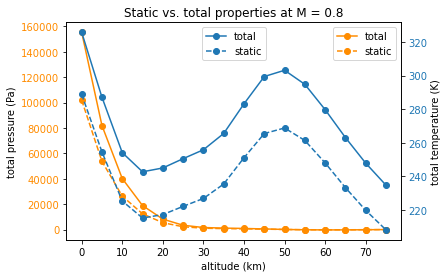

In [20]:
import matplotlib.pyplot as plt 

fig, ax1 = plt.subplots()
ax1.plot(h, Pt, '-o', color='darkorange')
ax1.plot(h, P, '--o', color='darkorange')
ax1.set_xlabel('altitude (km)')
ax1.set_ylabel('total pressure (Pa)')
ax1.tick_params(axis='y', labelcolor='darkorange')
ax1.legend(['total', 'static'])
ax1.set_title(f'Static vs. total properties at M = {M}')

ax2 = ax1.twinx() 
ax2.plot(h, Tt, '-o', color='#1f77b4')
ax2.plot(h, T, '--o', color='#1f77b4')
ax2.set_xlabel('altitude (km)')
ax2.set_ylabel('total temperature (K)')
ax2.tick_params(axis='y', labelcolor='#1f77b4')
ax2.legend(['total', 'static'], loc="upper center")